In [2]:


!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install pillow matplotlib scikit-learn tqdm
!pip install torchvision==0.15.2
!pip install seaborn 


Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.20.1%2Bcu121-cp312-cp312-win_amd64.whl (6.1 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.5.1%2Bcu121-cp312-cp312-win_amd64.whl (4.1 MB)



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3
ERROR: Could not find a version that satisfies the requirement torchvision==0.15.2 (from versions: 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0, 0.22.1, 0.23.0)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for torchvision==0.15.2



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("PyTorch CUDA runtime:", torch.version.cuda)


2.5.1+cu121
CUDA available: True
PyTorch CUDA runtime: 12.1


In [25]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [26]:
# Path to the dataset
data_dir = r"C:\Users\hp\Desktop\TERM 7\Capstone\dataset\train"


In [27]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),           # convert to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # normalize to [-1,1]
])
dataset = ImageFolder(root=data_dir, transform=transform)

print("Classes:", dataset.classes)  # should print ['fake', 'real']
print("Total images:", len(dataset))


Classes: ['fake', 'real']
Total images: 20000


In [28]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print(f"Train images: {len(train_dataset)}")
print(f"Validation images: {len(val_dataset)}")


Train images: 16000
Validation images: 4000


In [29]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


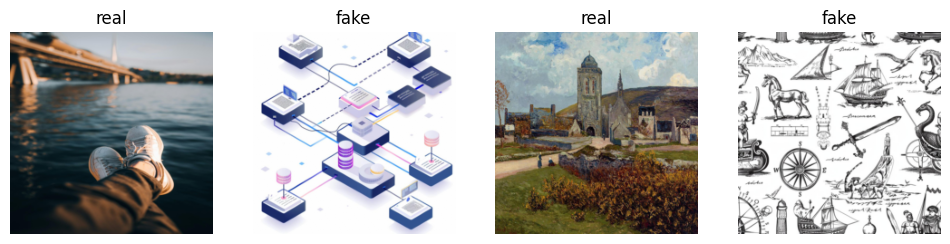

In [30]:
# Get one batch
images, labels = next(iter(train_loader))

# Plot 4 sample images
fig, axes = plt.subplots(1, 4, figsize=(12,3))
for i in range(4):
    img = images[i].permute(1, 2, 0)  # rearrange for matplotlib
    img = (img * 0.5 + 0.5).clamp(0,1)  # unnormalize back to [0,1]
    axes[i].imshow(img)
    axes[i].set_title(dataset.classes[labels[i]])
    axes[i].axis("off")
plt.show()


In [31]:
import torch.nn as nn
import torchvision.models as models

# Load pretrained ResNet18
model = models.resnet18(pretrained=True)

# Replace final layer for binary classification
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 classes: fake, real

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [32]:
# Check if CUDA is available
print("CUDA available:", torch.cuda.is_available())

# Check which device your model is on
print("Model device:", next(model.parameters()).device)

# Check current device name
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))
    print("GPU memory allocated:", torch.cuda.memory_allocated(0))
    print("GPU memory reserved:", torch.cuda.memory_reserved(0))


CUDA available: True
Model device: cuda:0
GPU name: NVIDIA GeForce GTX 1650
GPU memory allocated: 246623744
GPU memory reserved: 1394606080


In [33]:
import torch.nn as nn
import torch.optim as optim

# Loss function (Binary Cross Entropy with Logits, safer than plain BCE)
criterion = nn.CrossEntropyLoss()

# Optimizer (Adam is a good default)
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)


In [37]:
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim



# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
num_epochs = 10
best_val_acc = 0.0  # to save the best model

for epoch in range(num_epochs):
    # ---------------- TRAINING ----------------
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    
    # --- TQDM WRAPPER FOR TRAINING ---
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Training]", leave=False)

    for images, labels in train_loader_tqdm:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # --- UPDATE TQDM POSTFIX ---
        train_loader_tqdm.set_postfix({
            "Loss": f"{running_loss/total:.4f}",
            "Acc": f"{correct/total:.4f}"
        })

    train_loss = running_loss / total
    train_acc = correct / total

    # ---------------- VALIDATION ----------------
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    
    # --- TQDM WRAPPER FOR VALIDATION ---
    val_loader_tqdm = tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} [Validation]", leave=False)

    with torch.no_grad():
        for images, labels in val_loader_tqdm:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

            # --- UPDATE TQDM POSTFIX ---
            val_loader_tqdm.set_postfix({
                "Val Loss": f"{val_loss/val_total:.4f}",
                "Val Acc": f"{val_correct/val_total:.4f}"
            })

    val_loss /= val_total
    val_acc = val_correct / val_total

    # The final print statement gives a clean summary for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # ---------------- SAVE CHECKPOINT ----------------
    # Save every epoch
    # torch.save(model.state_dict(), f"checkpoint_epoch{epoch+1}.pth") # You can keep or remove this

    # Save best model only
    if val_acc > best_val_acc:
        print(f"✅ Validation Accuracy improved ({best_val_acc:.4f} --> {val_acc:.4f}). Saving model...")
        torch.save(model.state_dict(), "best_model.pth")
        best_val_acc = val_acc

Epoch [1/10] Train Loss: 0.1131, Train Acc: 0.9552 | Val Loss: 0.2993, Val Acc: 0.9015
✅ Validation Accuracy improved (0.0000 --> 0.9015). Saving model...


Epoch [2/10] Train Loss: 0.0642, Train Acc: 0.9764 | Val Loss: 0.2582, Val Acc: 0.9210
✅ Validation Accuracy improved (0.9015 --> 0.9210). Saving model...


Epoch [3/10] Train Loss: 0.0606, Train Acc: 0.9760 | Val Loss: 0.2922, Val Acc: 0.9165


Epoch [4/10] Train Loss: 0.0460, Train Acc: 0.9831 | Val Loss: 0.3312, Val Acc: 0.9012


Epoch [5/10] Train Loss: 0.0389, Train Acc: 0.9862 | Val Loss: 0.3215, Val Acc: 0.9065


Epoch [6/10] Train Loss: 0.0356, Train Acc: 0.9870 | Val Loss: 0.3352, Val Acc: 0.8988


Epoch [7/10] Train Loss: 0.0377, Train Acc: 0.9867 | Val Loss: 0.3293, Val Acc: 0.9095


Epoch [8/10] Train Loss: 0.0330, Train Acc: 0.9892 | Val Loss: 0.3537, Val Acc: 0.9100


Epoch [9/10] Train Loss: 0.0290, Train Acc: 0.9898 | Val Loss: 0.3677, Val Acc: 0.9123


Epoch [10/10] Train Loss: 0.0185, Train Acc: 0.9936 | Val Loss: 0.3855, Val Acc: 0.9052


Found 4000 images in the test set.
Classes: ['fake', 'real']


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\hp\AppData\Local\Temp\ipykernel_15560\3175720987.py:43: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release,


Model loaded from best_model.pth and set to evaluation mode.


Testing: 100%|███████████████████████████████████████████████████████████████████████| 125/125 [01:50<00:00,  1.14it/s]



CLASSIFICATION REPORT
              precision    recall  f1-score   support

        fake       0.91      0.92      0.91      2000
        real       0.92      0.91      0.91      2000

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000


Classification report saved to: test_results\classification_report.txt

CONFUSION MATRIX
[[1837  163]
 [ 182 1818]]

Confusion matrix image saved to: test_results\confusion_matrix.png


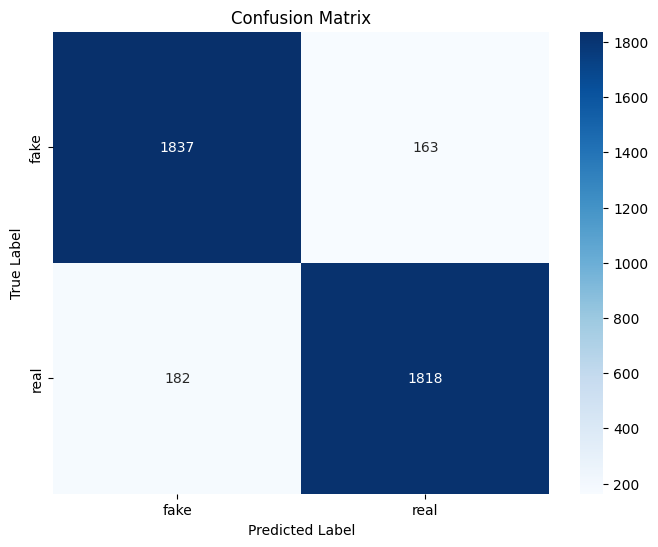

In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os # NEW: Import os to handle directories

# =====================================================================================
# STEP 1: PREPARE THE TEST DATASET
# =====================================================================================

test_dir = r"C:\Users\hp\Desktop\TERM 7\Capstone\dataset\test"
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_dataset = ImageFolder(root=test_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

class_names = test_dataset.classes
print(f"Found {len(test_dataset)} images in the test set.")
print("Classes:", class_names)


# =====================================================================================
# STEP 2: LOAD THE MODEL ARCHITECTURE AND BEST WEIGHTS
# =====================================================================================

model = models.resnet18(pretrained=False)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "best_model.pth"
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

print("\nModel loaded from best_model.pth and set to evaluation mode.")


# =====================================================================================
# STEP 3: RUN INFERENCE AND GATHER PREDICTIONS
# =====================================================================================

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


# =====================================================================================
# STEP 4: GENERATE, DISPLAY, AND SAVE REPORTS
# =====================================================================================

# --- NEW: Create a directory to save results ---
results_dir = 'test_results'
os.makedirs(results_dir, exist_ok=True)


# 1. Classification Report
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
# --- NEW: Generate report as a string first ---
report_str = classification_report(all_labels, all_preds, target_names=class_names)
print(report_str)

# --- NEW: Save the report string to a text file ---
report_path = os.path.join(results_dir, 'classification_report.txt')
with open(report_path, 'w') as f:
    f.write(report_str)
print(f"\nClassification report saved to: {report_path}")


# 2. Confusion Matrix
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(all_labels, all_preds)
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# --- NEW: Save the figure to a file before showing it ---
cm_image_path = os.path.join(results_dir, 'confusion_matrix.png')
plt.savefig(cm_image_path, dpi=300, bbox_inches='tight') # dpi for high resolution
print(f"\nConfusion matrix image saved to: {cm_image_path}")

# Finally, display the plot in the notebook
plt.show()


Model loaded from best_model.pth and set to evaluation mode.


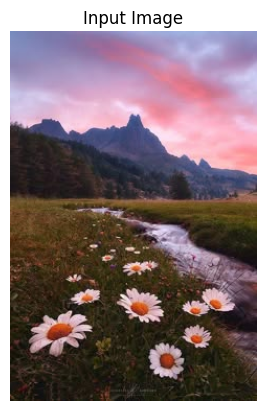

Prediction: 'REAL'
Confidence: 98.75%


In [12]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.models as models 



model = models.resnet18(weights=None)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = "best_model.pth"
model.load_state_dict(torch.load(model_path, map_location=device, weights_only=True))
model.to(device)
model.eval()

print("\nModel loaded from best_model.pth and set to evaluation mode.")

# --- STEP 1: Define the path to your image ---
image_path = r"C:\Users\hp\Desktop\real1.jpg"

# --- STEP 2: Define transformations and class names ---
inference_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
class_names = ['fake', 'real']

# --- STEP 3: Load, preprocess, and predict the image ---
try:
    image = Image.open(image_path).convert('RGB')
    input_tensor = inference_transform(image)
    input_batch = input_tensor.unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(input_batch)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        top_prob, top_catid = torch.max(probabilities, 0)
        predicted_class = class_names[top_catid.item()]
        confidence = top_prob.item() * 100

    # --- STEP 4: Display the results ---
    plt.imshow(image)
    plt.title(f"Input Image")
    plt.axis("off")
    plt.show()

    print(f"Prediction: '{predicted_class.upper()}'")
    print(f"Confidence: {confidence:.2f}%")

except FileNotFoundError:
    print(f"Error: The file was not found at the path: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")